In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
props = pd.read_csv('../data/curated/places_property.csv')


In [3]:
props= props.drop([2887])
props = props.reset_index(drop= True)

In [4]:
features = [
    'Estimated resident population (no.)',
    'Population density (persons/km2)',
    'Median age - persons (years)',
    'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
    'Health care and social assistance (no.)','Financial and insurance services (no.)',
    'Administrative and support services (no.)','Education and training (no.)',
    'Accommodation and food services (no.)',
    'Value of residential building ($m)', 'Houses - total (no.)', 
    'Townhouses - total (no.)', 'Apartments - total (no.)',
    'Median weekly household rental payment ($)', 'Rented (no.)',
    'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
    'Value of residential building ($m)', 
    'Median weekly household rental payment ($)', 'num_stops',	'num_stations',
	'num_schools', 'num_restaurants', 'num_landmarks', 'total_transport'
]
X = props[features]
y= props['Prices']


<Axes: >

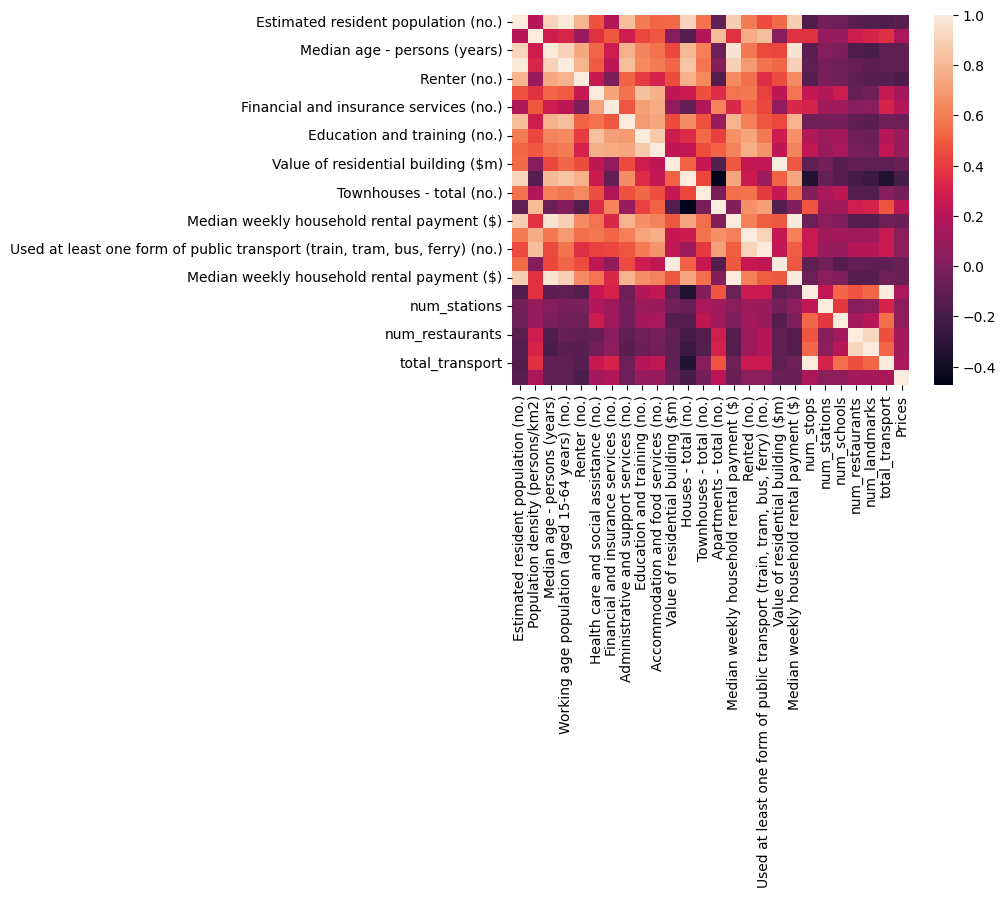

In [27]:
heatmap_features = features
heatmap_features.append('Prices')

heatmap_data = props[heatmap_features]
sns.heatmap(heatmap_data.corr())

In [10]:
#continous
test = SelectKBest(score_func=f_classif, k=9)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

new_features = fit.transform(X)

new_features.shape


mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features

[1.486 2.107 1.455 1.264 1.963 1.709 2.39  1.112 1.292 1.464 1.199 2.551
 1.379 3.23  1.139 1.227 1.307 1.199 1.139 2.585 1.495 1.742 2.933 2.474
 2.608]


['Population density (persons/km2)',
 'Renter (no.)',
 'Financial and insurance services (no.)',
 'Houses - total (no.)',
 'Apartments - total (no.)',
 'num_stops',
 'num_restaurants',
 'num_landmarks',
 'total_transport']

In [5]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=20037)





In [6]:

rfc  = RandomForestClassifier(max_depth= 6, max_features='sqrt', n_estimators=300, random_state=18).fit(X_train, y_train)


y_pred = rfc.predict(X_test)


print('Model accuracy score with 300 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 300 decision-trees : 0.0686


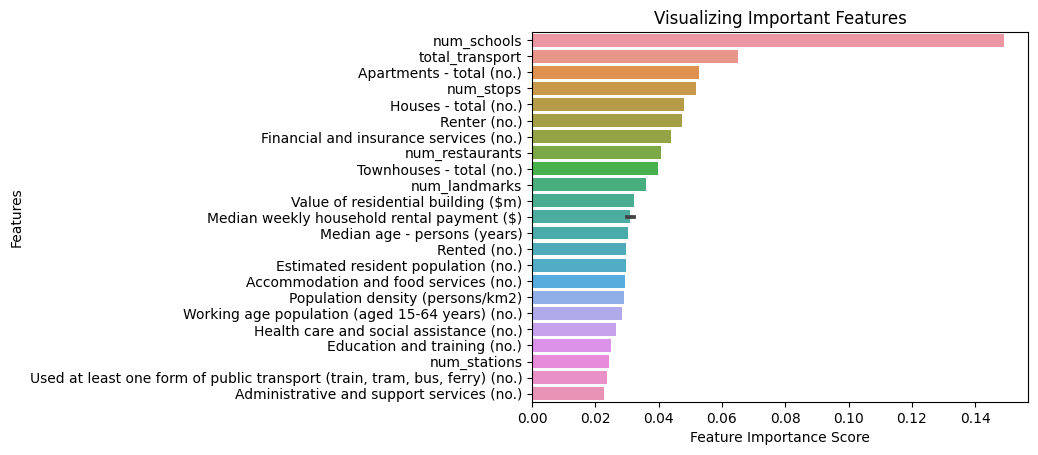

<Figure size 640x480 with 0 Axes>

In [8]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()
plt.savefig('visualising_important_features')

KMEANS

[0.6098870261543127, 0.4628216623405003, 0.46600988676971156, 0.4049065195310748, 0.42099828508442205, 0.386231242342668, 0.3820921196667229, 0.40318937217393414, 0.3985247286284384, 0.4010012099669093, 0.41455850060866356, 0.4092760109071908, 0.4181513910640044]


<Axes: >

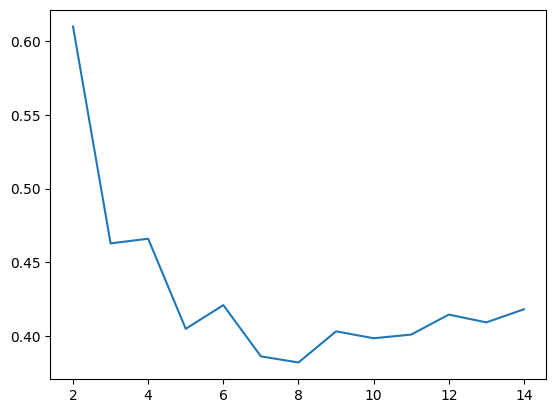

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20037)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

kmeans = KMeans(n_clusters=10, random_state=8, n_init='auto')
kmeans.fit(X_train_norm)

from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

K = range(2, 15)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

print(score)

sns.lineplot(x = K, y = score)

#Lower the better for the score

0.3820921196667229


<Axes: ylabel='Prices'>

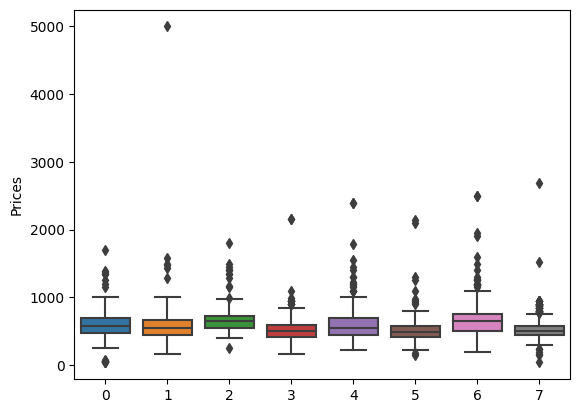

In [14]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

print(silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))


sns.boxplot(x = kmeans.labels_, y = y_train)